# 图的基础操作

- [networkx tutorial](https://networkx.org/documentation/latest/tutorial.html)

In [1]:
# conda install --channel conda-forge pygraphviz

In [2]:
import os
import math
import networkx as nx
import matplotlib.pyplot as plt

## 1. 创建图

### 1.1 从空图开始创建

In [3]:
# 在代码中创建
G = nx.Graph()

# 添加点
G.add_nodes_from(["spam"])

# 添加边
G.add_edges_from([(1, 2), (1, 3)])

In [4]:
# 查看图中所有节点
G.nodes

NodeView(('spam', 1, 2, 3))

In [5]:
# 查看图中所有边
G.edges

EdgeView([(1, 2), (1, 3)])

In [6]:
# 查看点 1 的邻居节点
G.adj[1]

AtlasView({2: {}, 3: {}})

In [7]:
# 查看节点个数
G.number_of_nodes()

4

In [8]:
# 查看边的个数
G.number_of_edges()

2

In [9]:
# 查看节点的度
G.degree

DegreeView({'spam': 0, 1: 2, 2: 1, 3: 1})

In [10]:
# 查看 节点 1 的度
G.degree(1)

2

In [11]:
# 查看 节点 1 和 节点 2 的度
G.degree([1, 2])

DegreeView({1: 2, 2: 1})

In [12]:
# 查看与 节点 2 和 节点 3 相连的边
G.edges([2, 3])

EdgeDataView([(2, 1), (3, 1)])

In [13]:
# 删除节点
G.remove_nodes_from("spam")

# 删除边
G.remove_edge(1, 3)

G.edges

EdgeView([(1, 2)])

### 1.2 用边文件创建

EdgeDataView([('0', '1', {}), ('0', '4', {}), ('1', '2', {}), ('1', '4', {}), ('4', '3', {})])

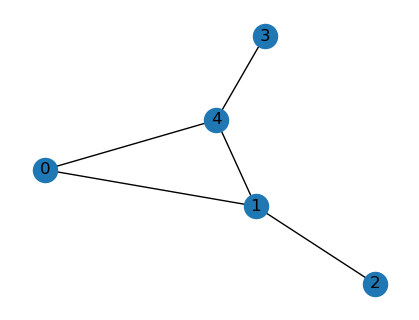

In [14]:
# 读入不带权边文件
G = nx.read_edgelist('./data/edges.txt')

plt.figure(figsize=(4, 3))
nx.draw_spring(G, with_labels=True)

G.edges.data(True)

EdgeDataView([('0', '1', {'weight': 0.1}), ('0', '4', {'weight': 3.0}), ('1', '2', {'weight': 0.3}), ('1', '4', {'weight': 0.5}), ('4', '3', {'weight': 0.75})])

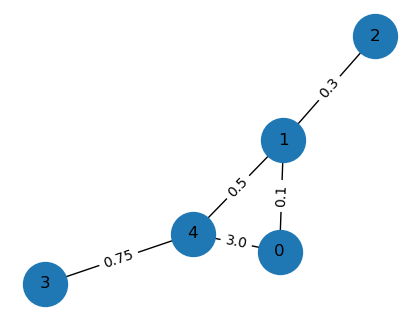

In [15]:
# 读入带权边文件
G = nx.read_weighted_edgelist('./data/weighted_edges.txt')

plt.figure(figsize=(4, 3))
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=1000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

G.edges.data(True)

### 1.3 用已经存在的图、边的列表创建

In [16]:
# 用已经存在的无向图 G 构建有向图
DG = nx.DiGraph(G)
DG.edges

OutEdgeView([('0', '1'), ('0', '4'), ('1', '0'), ('1', '2'), ('1', '4'), ('2', '1'), ('4', '1'), ('4', '3'), ('4', '0'), ('3', '4')])

In [17]:
# 从 edge list 中构建图
edgelist = [(0, 1), (1, 2), (2, 3)]
NG = nx.Graph(edgelist)
NG.edges

EdgeView([(0, 1), (1, 2), (2, 3)])

In [18]:
NG[1]  # same as G.adj[1]

AtlasView({0: {}, 2: {}})

### 1.4 创建带权边

In [19]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [20]:
for u, v, wt in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


In [21]:
FG.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.125}), (1, 3, {'weight': 0.75}), (2, 4, {'weight': 1.2}), (3, 4, {'weight': 0.375})])

### 1.5 为图添加属性

In [22]:
G = nx.Graph(name="network", date="2024-02-23")
G.graph

{'name': 'network', 'date': '2024-02-23'}

In [23]:
# 属性可以修改
G.graph['name'] = 'net'
G.graph

{'name': 'net', 'date': '2024-02-23'}

In [24]:
# 为节点添加属性
G.add_node(1)
G.nodes[1]['time'] = '5pm'
G.nodes.data()

NodeDataView({1: {'time': '5pm'}})

In [25]:
# 为边添加属性
G.add_edge(1, 2)
G.add_edge(1, 3)
G.edges[1, 3]['time'] = '2pm'
G.edges.data()

EdgeDataView([(1, 2, {}), (1, 3, {'time': '2pm'})])

In [26]:
G.edges[1, 3]

{'time': '2pm'}

### 1.6 创建有向图

In [27]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 13), (3, 1, 0.75), (4, 1, 0.75)])

In [28]:
# 出度
DG.out_degree(1)

1

In [29]:
DG.out_degree(2)

0

In [30]:
# 出度加权
DG.out_degree(1, weight='weight')

13

In [31]:
# 入度
DG.in_degree(1)

2

In [32]:
# 入度加权
DG.in_degree(1, weight='weight')

1.5

In [33]:
DG.edges(data=True)

OutEdgeDataView([(1, 2, {'weight': 13}), (3, 1, {'weight': 0.75}), (4, 1, {'weight': 0.75})])

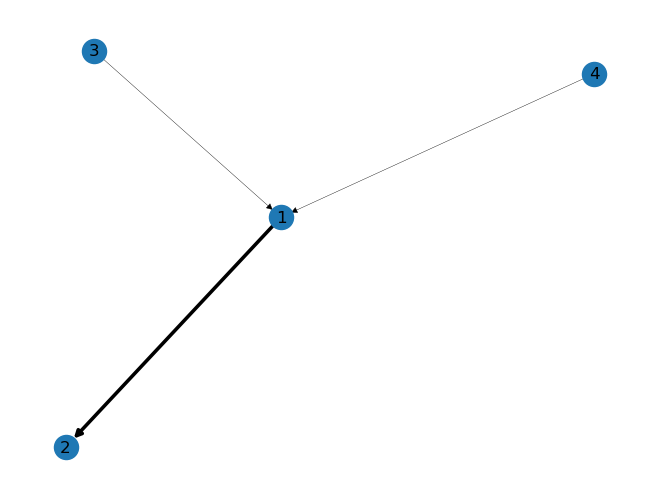

In [34]:
pos = nx.spring_layout(DG)
edges_width = [math.log(d.get('weight', 0.1)) for _, _ , d in DG.edges(data=True)]

nx.draw(DG, pos, with_labels=True, width=edges_width)

## 2. 可视化

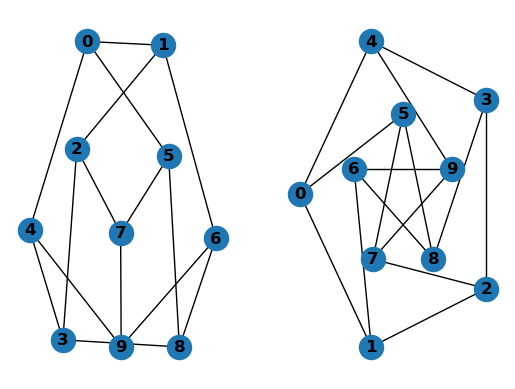

In [35]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

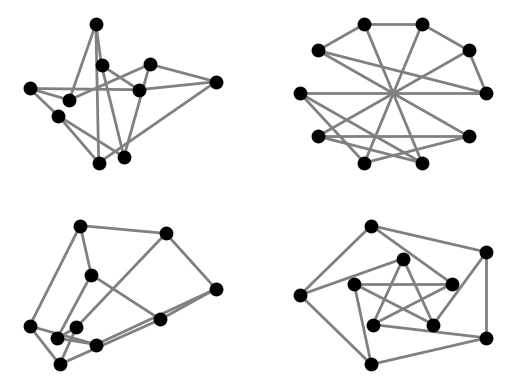

In [36]:
options = {
    'node_color': 'black',
    'edge_color': 'gray',
    'node_size': 80,
    'width': 2,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

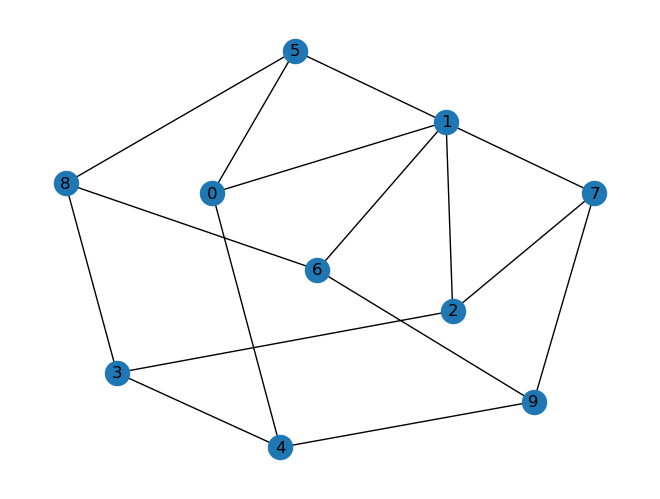

In [37]:
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos, with_labels=True)

## 3. 中心性度量

- **Degree Centrality**: Degree centrality of a node is simply the fraction of nodes it is connected to. You can calculate it using nx.degree_centrality().
- **Closeness Centrality**: Closeness centrality measures how close a node is to all other nodes in the graph. You can calculate it using nx.closeness_centrality().
- **Betweenness Centrality**: Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. You can calculate it using nx.betweenness_centrality().
- **Eigenvector Centrality**: Eigenvector centrality measures the influence of a node in the network, taking into account the centrality of its neighbors. You can calculate it using nx.eigenvector_centrality().

In [38]:
def calculate_centrality(G):
    # Calculate centrality
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)

    dct = dict()
    for node in G.nodes():
        dct[node] = {
            'degree_centrality': float(degree_centrality[node]),
            'closeness_centrality': float(closeness_centrality[node]),
            'betweenness_centrality': float(betweenness_centrality[node]),
            'eigenvector_centrality': float(eigenvector_centrality[node])}

    return dct

KG = nx.karate_club_graph()
centrality_dict = calculate_centrality(KG)
# centrality_dict

Text(0.5, 1.0, 'eigenvector_centrality')

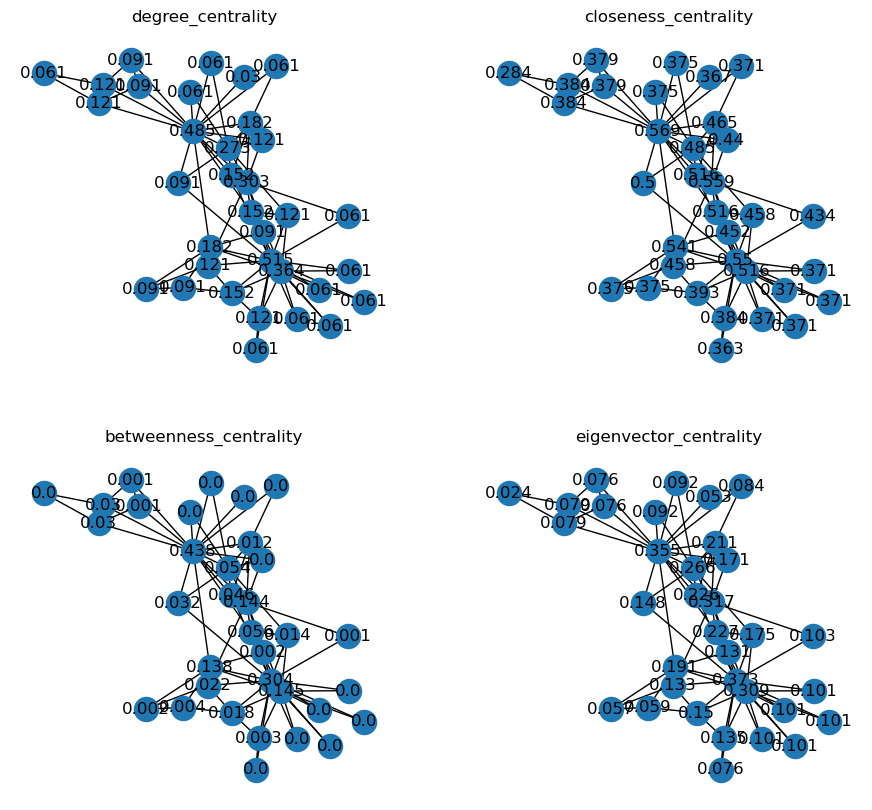

In [39]:
keys = list([e for e in centrality_dict.items()][0][1].keys())
layout = nx.spring_layout(KG)

plt.figure(figsize=(11, 10))

subax1 = plt.subplot(221)
nx.draw(KG, pos=layout, with_labels=True,
        labels={k: round(v[keys[0]], 3) for k, v in centrality_dict.items()})
plt.title(keys[0])

subax2 = plt.subplot(222)
nx.draw(KG, pos=layout, with_labels=True,
        labels={k: round(v[keys[1]], 3) for k, v in centrality_dict.items()})
plt.title(keys[1])

subax3 = plt.subplot(223)
nx.draw(KG, pos=layout, with_labels=True,
        labels={k: round(v[keys[2]], 3) for k, v in centrality_dict.items()})
plt.title(keys[2])

subax4 = plt.subplot(224)
nx.draw(KG, pos=layout, with_labels=True,
        labels={k: round(v[keys[3]], 3) for k, v in centrality_dict.items()})
plt.title(keys[3])

## 4. 随机图生成

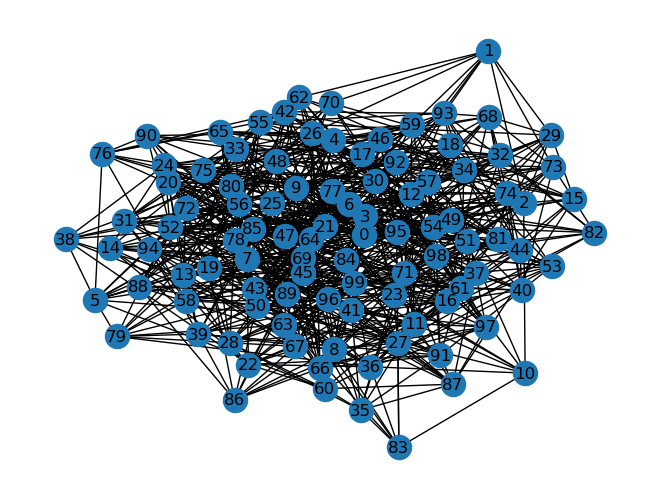

In [40]:
er = nx.erdos_renyi_graph(100, 0.15)

pos = nx.spring_layout(er)
nx.draw(er, pos, with_labels=True)

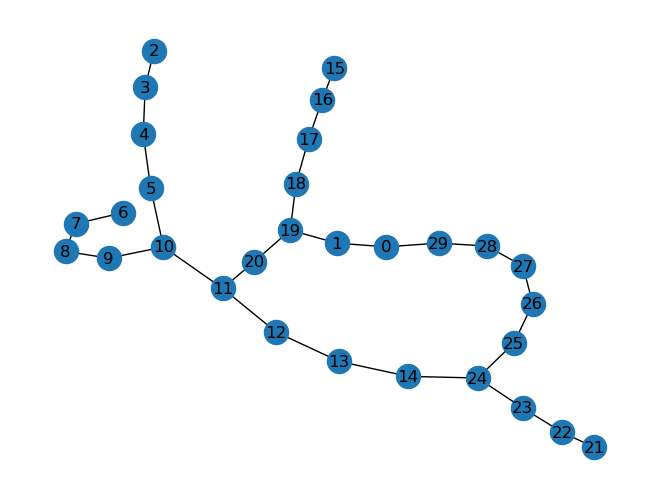

In [41]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)

pos = nx.spring_layout(ws)
nx.draw(ws, pos, with_labels=True)

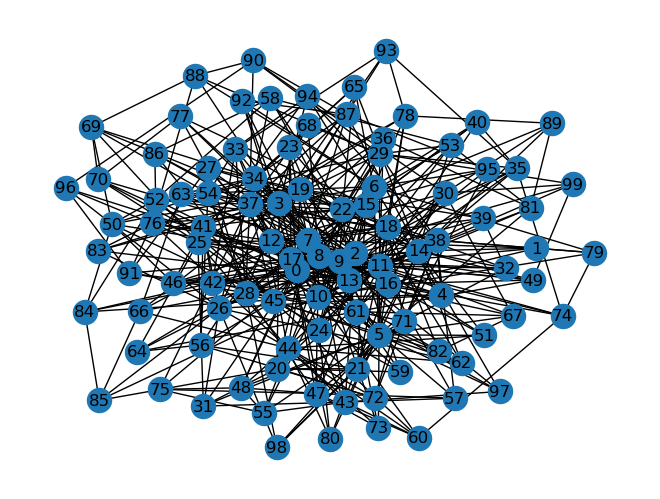

In [42]:
ba = nx.barabasi_albert_graph(100, 5)

pos = nx.spring_layout(ba)
nx.draw(ba, pos, with_labels=True)

In [43]:
# red = nx.random_lobster(100, 0.9, 0.9)

# pos = nx.spring_layout(red)
# nx.draw(red, pos, with_labels=True)

## 5. 读写文件

### 5.1 写入文件

In [44]:
PG = nx.petersen_graph()

filename = 'watts_strogatz_graph'
data_path = os.path.abspath('./data/')

In [45]:
graphml_file = os.path.join(data_path, filename) + '.graphml'
nx.write_graphml(PG, graphml_file)

In [46]:
gexf_file = os.path.join(data_path, filename) + '.gexf'
nx.write_gexf(PG, gexf_file)

In [47]:
net_file = os.path.join(data_path, filename) + '.net'
nx.write_pajek(PG, net_file)

### 5.2 读出数据

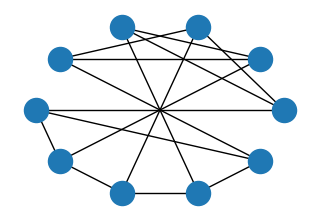

In [48]:
G = nx.read_graphml(graphml_file)
plt.figure(figsize=(3, 2))
nx.draw_shell(G)

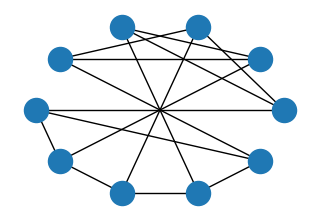

In [49]:
G = nx.read_gexf(gexf_file)
plt.figure(figsize=(3, 2))
nx.draw_shell(G)

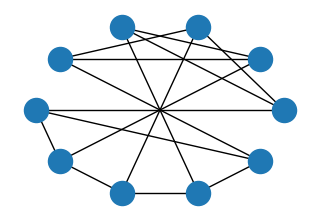

In [50]:
G = nx.read_pajek(net_file)
plt.figure(figsize=(3, 2))
nx.draw_shell(G)